# Zgony według tygodni, GUS
## W podziale na województwa, powiaty i 5-letnie grupy wiekowe

Potrzebne funkcje w plikach:
* helper_functions.py
* govpl_function.py

Uwaga: 
...

## TODO
* ...

In [10]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------

from share.helper_functions import (
    getfile, 
    unzip, 
    xlsx2xls, 
    display_all,
    set_legend_right

)
from typing import NamedTuple
from share.gus_functions import (
    GUSparams,
    Analysis
    )
# import govpl_functions as govpl
import pandas as pd
import importlib
import glob
import os
from sorcery import dict_of
import matplotlib.pyplot as plt


In [2]:
params = dict_of(
    data_dir = './gus_data',
    img_dir = './images',
    url =\
    'https://stat.gov.pl/download/gfx/portalinformacyjny/pl/defaultaktualnosci/5468/39/2/1/zgony_wg_tygodni.zip',
    zipfile = 'zgony_wg_tygodni.zip',
    file_prefix = 'Zgony wedêug tygodni w Polsce_',
    file_prefix_terminal = 'Zgony\ wedêug\ tygodni\ w\ Polsce_',
    file_suffix = '.xlsx',
    libreoffice_cmd = 'libreoffice7.2',
    year_start = 2000,
    year_end = 2021
)


In [3]:
mygus = Analysis(params)

In [4]:
mygus.getdata()

Getting GUS data...
./gus_data/zgony_wg_tygodni.zip exists, so not downloaded
*.xlsx or *.xls files exist in ./gus_data/zgony_wg_tygodni, so zip file not extracted
*.xls files exist in ./gus_data/zgony_wg_tygodni, so *.xlsx files not converted to *.xls
Making dictionary of year GUS data frames for each year: year_data_dict {int : pandas.DataFrame}
2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 
Merging GUS data frames from dict in a single data frame: all_years_df
Done.


In [6]:
# %load_ext autoreload
# %autoreload

# from share.helper_functions import (
#     getfile, 
#     unzip, 
#     xlsx2xls, 
#     display_all
# )

In [5]:
# mygus.all_years_df

In [6]:
df = mygus.all_years_df
df_og = df[(df['Wiek zmarłych w latach']=='Ogółem') & (df['NUTS']=='PL')].copy(deep=True)
df_og.reset_index(drop=True, inplace=True)
df_og.drop(['Wiek zmarłych w latach', 'NUTS', 'Podregiony' ], axis=1, inplace=True)
df_og = df_og.set_index('Rok').T.reset_index(drop=True)
df_og.index.name = 'Tydzień'

In [7]:
# df_og

<AxesSubplot:title={'center':'Tytuł'}, xlabel='Tydzień'>

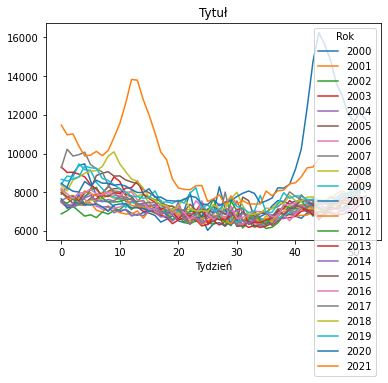

In [8]:
plotopts = {
    'title' : 'Tytuł'
}

df_og.plot(**plotopts)

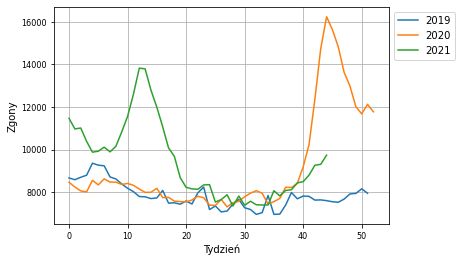

In [13]:
fig, ax = plt.subplots()
df_og.plot(y=[2019,2020,2021],ax=ax,grid=True,fontsize=8)
set_legend_right()
ax.set(ylabel='Zgony')
plt.show()